In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [150]:
data2 = (data2 - data2.mean()) /(data2.std())
data2.head()#归一化

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [151]:
data2.insert(0,'Ones',1)
data2.head()#增加一列全1，即x0

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [152]:
#代价函数
def computerCost(X,y,theta):
    data1 = np.power(((X*theta.T)-y),2)
    return np.sum(data1)/(2*len(X))

In [153]:
#梯度下降
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    pa = int(theta.ravel().shape[1]) #几个theta
    cost = np.zeros(iters)#初始化所有代价
    #在规定迭代次数内依次循环
    for i in range(iters):
        cost1 = (X*theta.T) -y
        #依次遍历每个theta
        for j in range(pa):
            cost2 = np.multiply(cost1,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X))*np.sum(cost2))
        theta = temp
        cost[i] = computerCost(X,y,theta)
    return theta,cost

In [154]:
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]#取x
y2 = data2.iloc[:,cols-1:cols]#取y
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)#把x,y转变为矩阵
theta2 = np.matrix(np.array([0,0,0]))#初始化theta
alpha = 0.01
iters = 1000
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)
print(g2)
computerCost(X2,y2,g2)


[[-1.10868761e-16  8.78503652e-01 -4.69166570e-02]]


0.13070336960771892

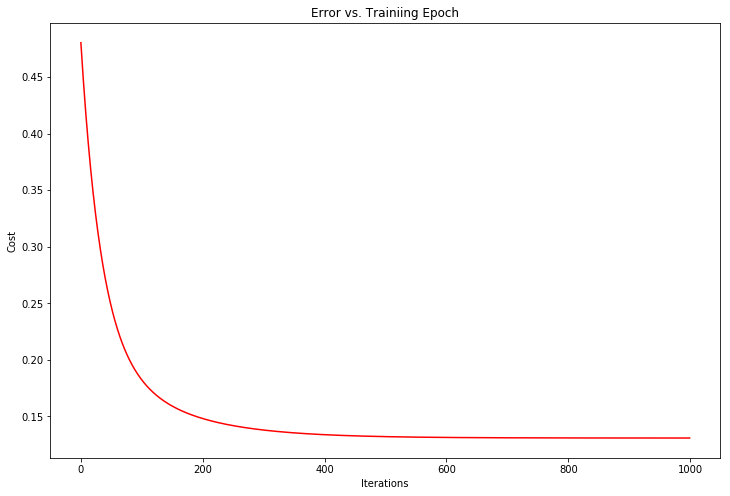

In [155]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Trainiing Epoch')
plt.show()

In [156]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

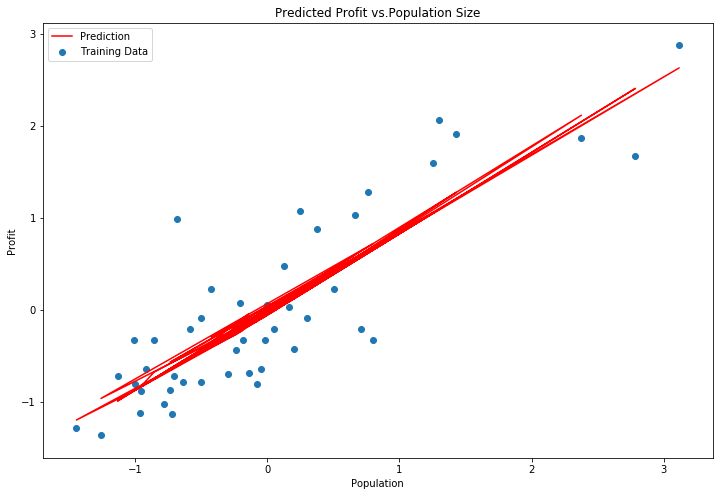

In [157]:
#x = np.array(X2[:,1].A1)
f = model.predict(X2).flatten()

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data2.Size,data2.Price,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs.Population Size')
plt.show()

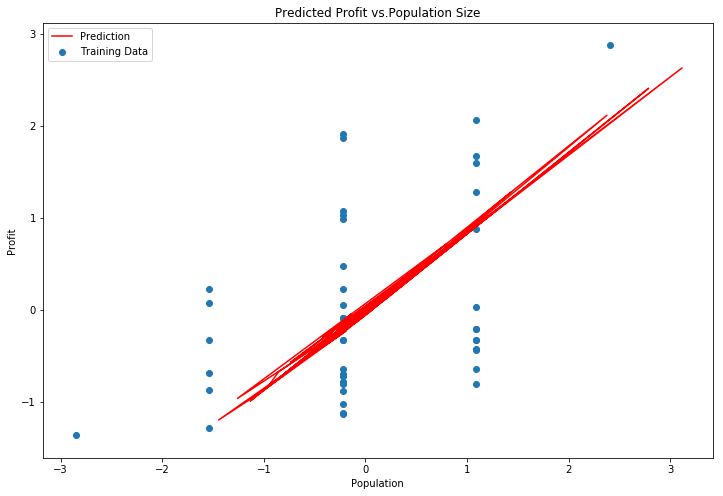

In [158]:
#x = np.array(X2[:,1].A1)
f = model.predict(X2).flatten()

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data2.Bedrooms,data2.Price,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs.Population Size')
plt.show()